# Credit card fraud detection

In [102]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
credit_data = pd.read_csv('creditcard.csv')

In [3]:
credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data preprocessing

In [4]:
credit_data.shape

(284807, 31)

In [5]:
credit_data.size

8829017

In [6]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
credit_data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
print('Number of rows', credit_data.shape[0])
print('Number of columns', credit_data.shape[1])

Number of rows 284807
Number of columns 31


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()
credit_data['Amount'] = sc.fit_transform(pd.DataFrame(credit_data['Amount'])) 

In [13]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
credit_data = credit_data.drop(['Time'], axis=1)

In [15]:
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [16]:
credit_data.duplicated().any()

True

In [17]:
credit_data = credit_data.drop_duplicates()

In [18]:
credit_data.shape

(275663, 30)

In [19]:
credit_data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [25]:
legit = credit_data[credit_data.Class==0]
fraud = credit_data[credit_data['Class']==1]

In [26]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 473, dtype: int64

In [27]:
legit.Amount.describe()

count    275190.000000
mean          0.008682
std           1.012309
min          -0.353229
25%          -0.327682
50%          -0.258275
75%          -0.033782
max         102.362243
Name: Amount, dtype: float64

In [29]:
credit_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.029792,-0.008288,0.037131,-0.012054,-0.005596,-0.011768,0.017497,-0.007346,-0.008050,0.012492,...,0.002717,0.001781,0.005689,-0.001779,-0.006696,-0.004890,-0.000327,0.001557,0.000771,0.008682
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


In [30]:
legit_sample = legit.sample(n=492)

In [31]:
new_data = pd.concat([legit_sample,fraud],axis=0)

In [33]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
136754,1.301798,-1.170032,-0.244466,-1.515675,-0.870002,-0.295976,-0.535385,-0.100750,-2.441687,1.536298,...,-0.390950,-0.998559,0.046560,-0.351427,0.247606,-0.427378,-0.002259,0.015141,0.079443,0
274538,2.040468,-1.453712,-1.852079,-1.907692,1.162493,3.697874,-1.662043,0.961862,-0.042185,0.759573,...,0.429861,1.053413,0.125315,0.744445,-0.183059,-0.051424,0.025487,-0.041294,-0.085358,0
18324,1.501540,-0.797578,-0.054047,-1.312796,-1.080745,-1.066227,-0.509636,-0.313412,-2.248904,1.449030,...,-0.123752,0.096364,-0.010003,0.415225,0.571994,-0.074196,0.015538,0.006253,-0.313249,0
271239,2.054002,0.523225,-3.196006,0.618924,1.170933,-1.302178,0.597304,-0.222190,0.010492,-0.837161,...,-0.029067,0.013091,-0.024276,0.489884,0.296138,0.669970,-0.092979,-0.026763,-0.350191,0
19487,1.220089,0.576802,-0.365253,1.121952,0.208446,-0.692656,0.156710,-0.050598,-0.250822,-0.383309,...,-0.027342,-0.064184,-0.167556,-0.123118,0.690736,-0.322837,0.024724,0.036734,-0.349231,0


In [35]:
new_data['Class'].value_counts()

Class
0    492
1    473
Name: count, dtype: int64

In [36]:
new_data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.144485,-0.005396,0.019267,-0.073610,-0.004070,0.003249,0.108556,0.063216,-0.009194,-0.063733,...,0.044423,-0.026601,-0.028922,0.009387,-0.006269,-0.004343,0.037663,0.002439,0.007441,0.027446
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,0.142021


# Data Visualization

<AxesSubplot:ylabel='count'>

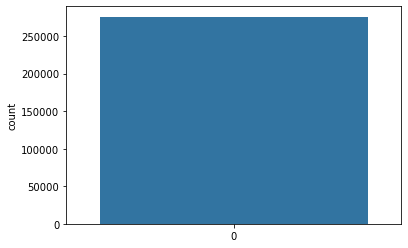

In [20]:
sns.countplot(credit_data['Class'])

<AxesSubplot:ylabel='count'>

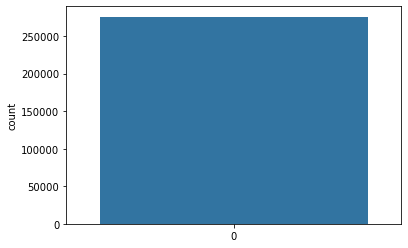

In [21]:
sns.countplot(credit_data['Amount'])

In [22]:
credit_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243,1.000000


<AxesSubplot:>

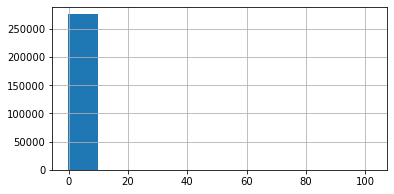

In [23]:
plt.figure(figsize=(6,3))
#credit_data['Time'].hist()
credit_data['Amount'].hist()
credit_data['Class'].hist()

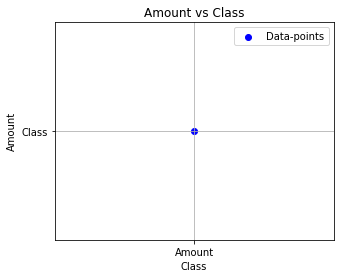

In [24]:
# scatter plot 
plt.figure(figsize=(5,4))
plt.scatter('Amount', 'Class', color='blue', marker='o', label='Data-points')
plt.title('Amount vs Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
# Splitting the dataset into X and Y
x = new_data.drop(columns='Class', axis=1)
y = new_data['Class']

# Model building

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [39]:
model = LogisticRegression()

In [73]:
# LogisticRegression
# training the model with logisticRegression with train data
model.fit(x_train, y_train)
#accuracy of trainining data
y_train_prediction = model.predict(x_train)
training_data_prediction = accuracy_score(y_train_prediction, y_train)
print("accuracy of training data: ", training_data_prediction)

accuracy of training data:  0.9572538860103627


In [74]:
# now accuracy of testing data
y_test_prediction = model.predict(x_test)
testing_data_prediction = accuracy_score(y_test_prediction, y_test)
print("accuracy of testing data: ", testing_data_prediction)

accuracy of testing data:  0.9481865284974094


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
precision_score(y_test, y_test_prediction)

0.9885057471264368

In [77]:
recall_score(y_test, y_test_prediction)

0.9052631578947369

In [78]:
f1_score(y_test, y_test_prediction)

0.945054945054945

In [79]:
# DecisionTreeClassifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
model1 = DecisionTreeClassifier()

In [82]:
# on training data
model1.fit(x_train, y_train)
y_train_prediction1 = model1.predict(x_train)
training_data_prediction1 = accuracy_score(y_train_prediction1, y_train)
print("accuracy of training data: ", training_data_prediction1)

accuracy of training data:  1.0


In [83]:
# on testing data
y_test_prediction1 = model1.predict(x_test)
test_data_pred = accuracy_score(y_test_prediction1, y_test)
print("accuracy of testing data: ", test_data_pred)

accuracy of testing data:  0.9119170984455959


In [84]:
precision_score(y_test, y_test_prediction1)

0.9333333333333333

In [85]:
recall_score(y_test, y_test_prediction1)

0.8842105263157894

In [86]:
f1_score(y_test, y_test_prediction1)

0.9081081081081082

In [87]:
# RandomForestClassifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model2 = RandomForestClassifier

In [112]:
# training data

model2 = model.fit(x_train, y_train)
y_train_prediction2 = model1.predict(x_train)
training_data_prediction2 = accuracy_score(y_train_prediction2, y_train)
print("accuracy of training data: ", training_data_prediction2)

accuracy of training data:  1.0


In [113]:
# testing data
y_test_prediction2 = model2.predict(x_test)
test_data_pred2 = accuracy_score(y_test_prediction2, y_test)
print("accuracy of testing data: ", test_data_pred2)

accuracy of testing data:  0.9481865284974094


In [114]:
precision_score(y_test, y_test_prediction2)

0.9885057471264368

In [115]:
recall_score(y_test, y_test_prediction2)

0.9052631578947369

In [116]:
f1_score(y_test, y_test_prediction2)

0.945054945054945

In [117]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_test_prediction)*100,
                     accuracy_score(y_test,y_test_prediction1)*100,
                     accuracy_score(y_test,y_test_prediction2)*100
                    ]})

In [118]:
final_data

,Models,ACC
0,LR,94.818653
1,DT,91.191710
2,RF,94.818653


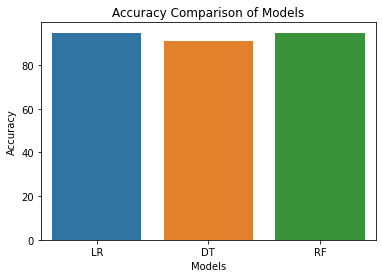

In [119]:
#  data
final_data =pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_test_prediction)*100,
                     accuracy_score(y_test,y_test_prediction1)*100,
                     accuracy_score(y_test,y_test_prediction2)*100
                    ]})

# Create a bar plot
sns.barplot(x='Models', y='ACC', data=final_data)

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

# Display the plot
plt.show()

In [122]:
# saving the file
import pickle
model_data = pickle.dump(model2, open('credit_data_model.pkl', 'wb') )

# Evaluating function

In [108]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [109]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
